In [78]:
import pandas as pd
import geopandas as gpd
import numpy as np

<Axes: >

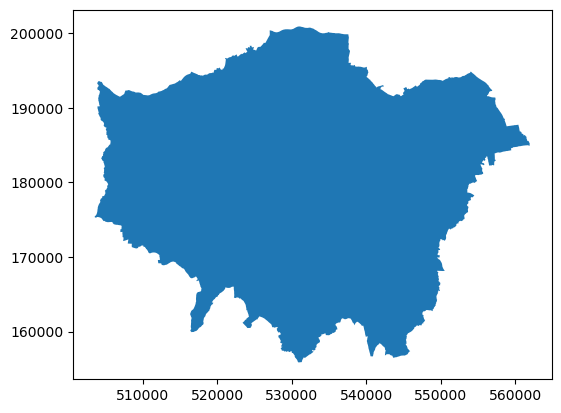

In [107]:
gla = gpd.read_file('data/gla/London_GLA_Boundary.shp')
gla.plot()

In [184]:
import pyproj

# get coordinates of gla boundary
gla_coords = list(gla.geometry[0].exterior.coords)
# Define the source and destination coordinate systems
# EPSG:27700 is the code for the British National Grid (BNG)
bng = pyproj.CRS("EPSG:27700")

# EPSG:4326 is the code for the WGS 84, used for latitude/longitude
wgs84 = pyproj.CRS("EPSG:4326")

# Create a transformer object to convert between the two CRSs
transformer = pyproj.Transformer.from_crs(bng, wgs84)

# Separate the eastings and northings into individual lists
eastings = [easting for easting, northing in gla_coords]
northings = [northing for easting, northing in gla_coords]

# Perform the transformation
longitudes, latitudes = transformer.transform(eastings, northings)

# Combine the results back into a list of (lat, lon) tuples
latlon_coords = list(zip(latitudes,longitudes))
latlon_coords

[(-0.09688799800459241, 51.6905515136805),
 (-0.09667432358699883, 51.690471616785516),
 (-0.09656064213991071, 51.690491356167556),
 (-0.095881680226654, 51.69032838138783),
 (-0.09532067892244586, 51.69018170323506),
 (-0.09480277859739987, 51.69011125695196),
 (-0.09431510321086643, 51.69007906649082),
 (-0.09308727256115892, 51.69003216234706),
 (-0.09205683416119931, 51.68997046723317),
 (-0.09148309289305612, 51.689920680753794),
 (-0.09114142269560171, 51.68992591941038),
 (-0.09017621195834105, 51.68989584167787),
 (-0.08952144786514926, 51.68991486828335),
 (-0.08902587615363325, 51.6899328843902),
 (-0.08851303709181782, 51.68998298977129),
 (-0.08787624073895556, 51.69005625356529),
 (-0.08712651566852302, 51.69013127178874),
 (-0.0866315472242435, 51.6901348999089),
 (-0.08635859313170428, 51.69015743019863),
 (-0.08623375848733884, 51.69016708633332),
 (-0.08585072563376181, 51.69015814717621),
 (-0.08539996622683417, 51.69014270742687),
 (-0.08484685191232051, 51.69008423

In [192]:

cells

['897b810cd7bffff',
 '897b81732bbffff',
 '897b811710fffff',
 '897b8168e6bffff',
 '897b810292bffff',
 '897b8117053ffff',
 '897b8173143ffff',
 '897b81171cbffff',
 '897b810286fffff',
 '897b810ce37ffff',
 '897b810cc03ffff',
 '897b8102aa3ffff',
 '897b8173087ffff',
 '897b8173377ffff',
 '897b810cb47ffff',
 '897b8168c37ffff',
 '897b810ca8bffff',
 '897b810263bffff',
 '897b810c9cfffff',
 '897b8117287ffff',
 '897b8172e53ffff',
 '897b810c913ffff',
 '897b8172d97ffff',
 '897b81024c3ffff',
 '897b810c857ffff',
 '897b8173433ffff',
 '897b8172cdbffff',
 '897b8102407ffff',
 '897b816888bffff',
 '897b810234bffff',
 '897b8172b63ffff',
 '897b8154977ffff',
 '897b8117343ffff',
 '897b810228fffff',
 '897b810c623ffff',
 '897b83a6057ffff',
 '897b8102c1bffff',
 '897b8172aa7ffff',
 '897b81021d3ffff',
 '897b816915bffff',
 '897b810c567ffff',
 '897b8168657ffff',
 '897b8102117ffff',
 '897b810c4abffff',
 '897b816859bffff',
 '897b810d06bffff',
 '897b817292fffff',
 '897b83a6113ffff',
 '897b8102cd7ffff',
 '897b81735abffff',


In [221]:
msoa_map[['LAT','LONG']]

LAT      LONG
0     51.5156 -0.093490
1     51.5865  0.138756
2     51.5761  0.138149
3     51.5564  0.176828
4     51.5607  0.144267
...       ...       ...
7259  53.0901 -2.963220
7260  53.0757 -2.934290
7261  53.0588 -2.974800
7262  51.6781 -3.630870
7263  51.6173 -4.028940

[7264 rows x 2 columns]

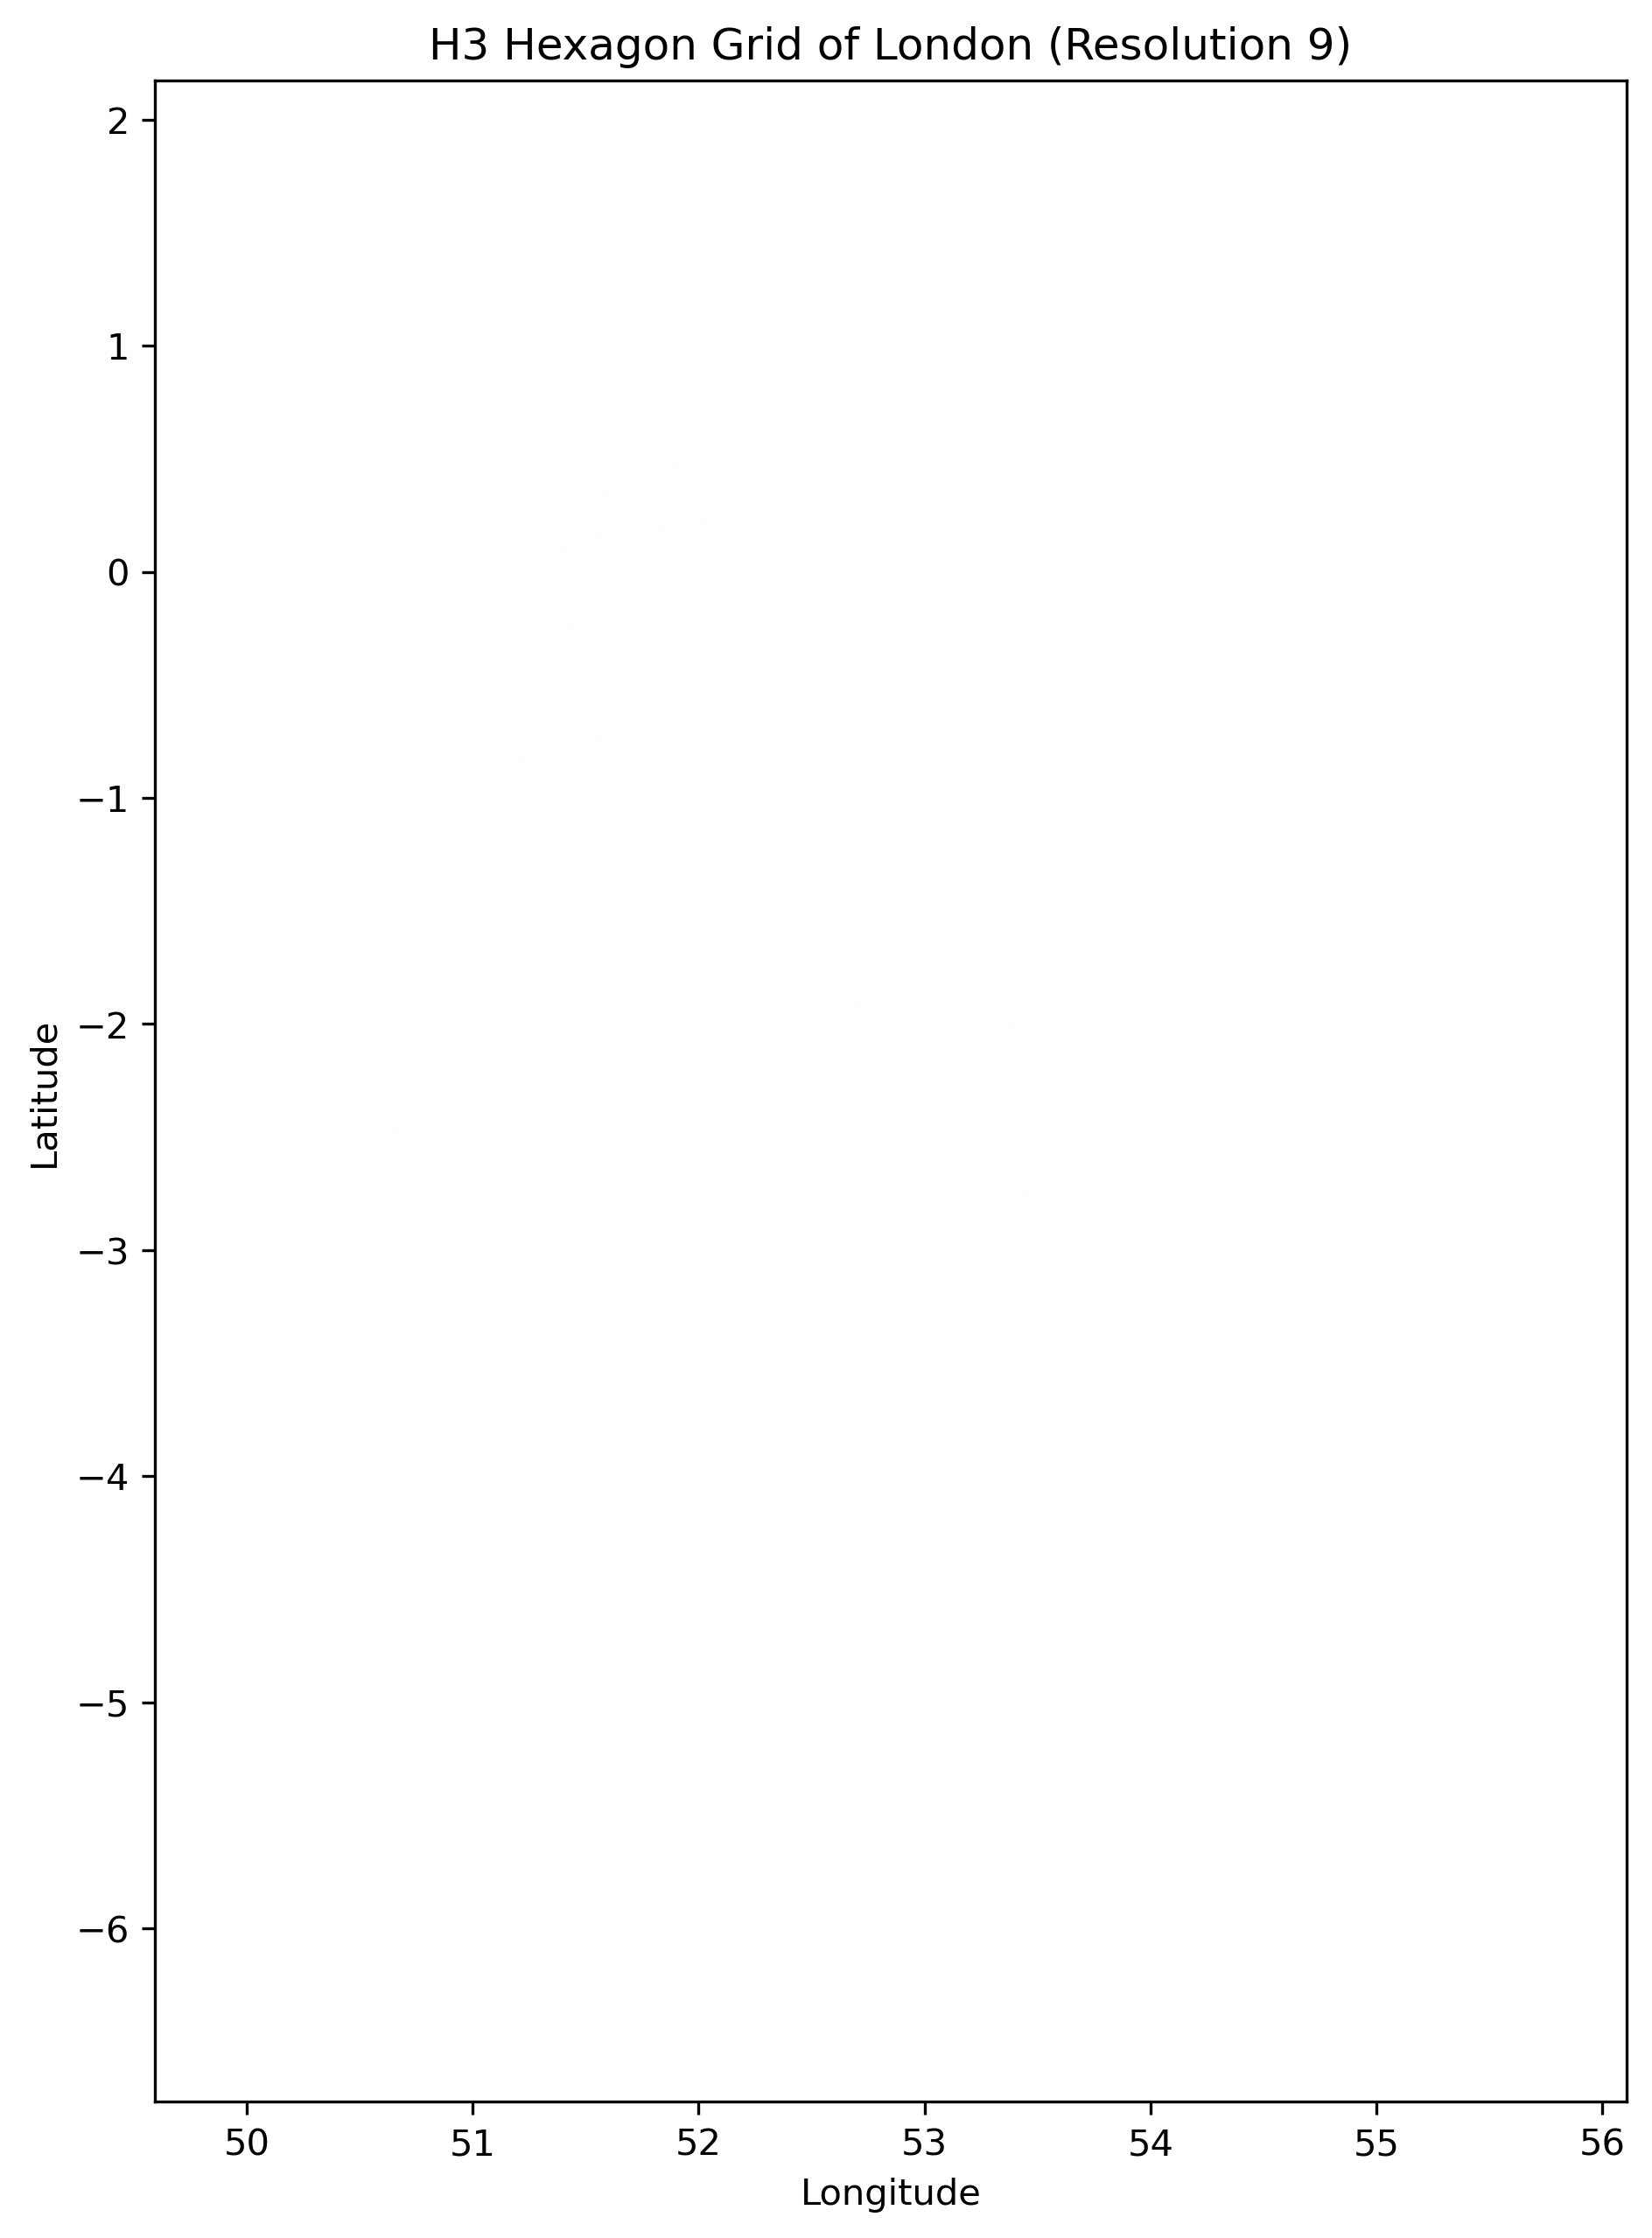

In [218]:
london_polygon = gla.geometry.iloc[0]

h3_poly = h3.LatLngPoly(outer=latlon_coords)

cells = h3.h3shape_to_cells(h3shape=h3_poly, res=9)

# Step 6: Convert the H3 polygons to a GeoDataFrame.
# This loop gets the boundary for each H3 index and creates a polygon.
geometries = []
for h3_index in h9_cell:
    hex_boundary = h3.cell_to_boundary(h3_index)
    geometries.append(Polygon(hex_boundary))

h3_gdf = gpd.GeoDataFrame(
    {'h3_index': list(h9_cell)},
    geometry=geometries,
    crs='EPSG:4326'
)

# Step 7: Plot the H3 grid.
fig, ax = plt.subplots(figsize=(10, 10), dpi=300)

# Plot the H3 grid on top
h3_gdf.plot(
    ax=ax,
    edgecolor='white',
    linewidth=0.5,
    facecolor='lightblue'
)

# Add labels and a title
ax.set_title(f"H3 Hexagon Grid of London (Resolution {h3_resolution})")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Show the plot
plt.show()


In [108]:
h9 = pd.read_csv("data/hex_OD_allactivity.csv.gz", compression="gzip")

In [216]:
h9_cell = list(set(list(set(h9.o_h9))+list(set(h9.d_h9))))

In [203]:
intra_h9_trips = h9[h9['o_h9'] == h9['d_h9']]
intra_h9_trips

o_h9             d_h9  num_trips
0         89194e6e943ffff  89194e6e943ffff       3216
1         89195d3627bffff  89195d3627bffff       1829
3         8919423b69bffff  8919423b69bffff       1808
6         8919586b4b3ffff  8919586b4b3ffff       1526
7         89194e6520fffff  89194e6520fffff       1384
...                   ...              ...        ...
21768725  89194a12ed3ffff  89194a12ed3ffff          1
21768983  891959028cbffff  891959028cbffff          1
21769252  89195d2741bffff  89195d2741bffff          1
21769284  89195b468dbffff  89195b468dbffff          1
21769438  891959c45cbffff  891959c45cbffff          1

[155772 rows x 3 columns]

E:\program\anaconda\Lib\site-packages\mapclassify\classifiers.py:1592: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 1.
  self.bins = quantile(y, k=k)


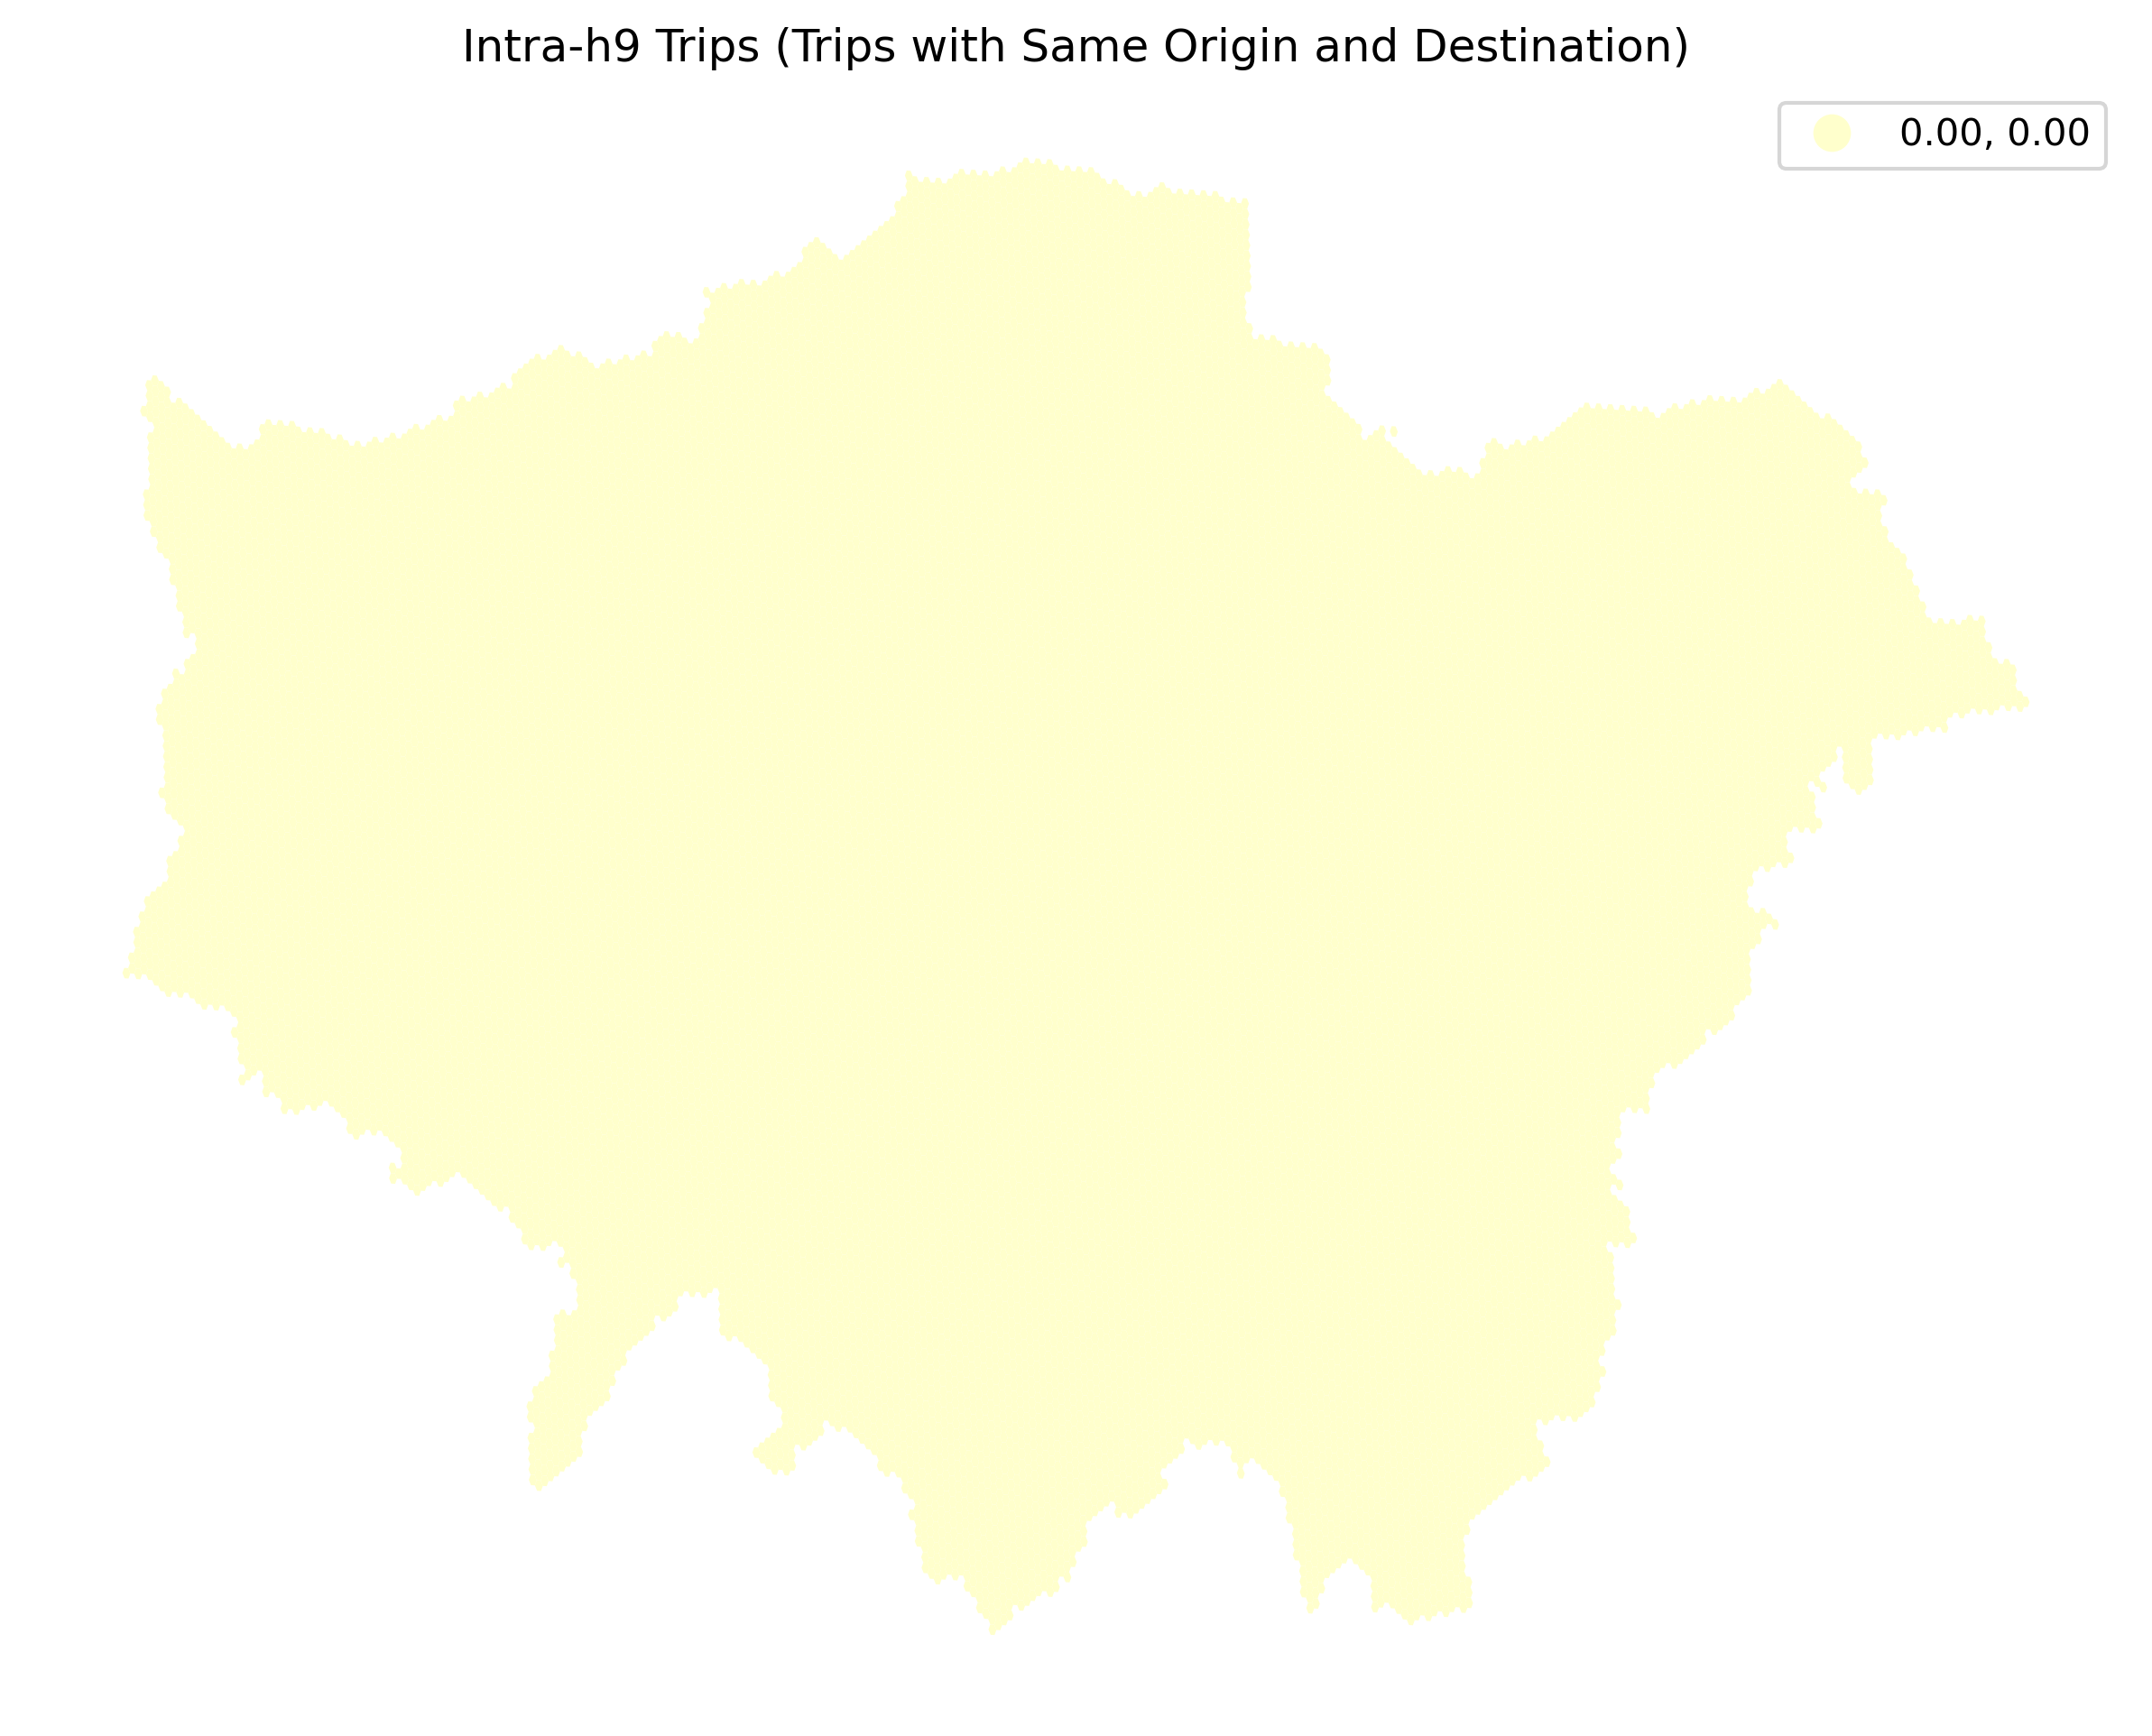

In [204]:
merged_gdf_h9 = h3_gdf.merge(
    intra_h9_trips,
    left_on='h3_index',
    right_on='o_h9',
    how='left'
)

# Fill any NaN values in `num_trips` with 0 after the merge.
merged_gdf_h9['num_trips'] = merged_gdf_h9['num_trips'].fillna(0)

# Create the map colored by num_trips.
fig, ax = plt.subplots(1, 1, figsize=(10, 10), dpi=300)
merged_gdf_h9.plot(
    column='num_trips',
    ax=ax,
    legend=True,
    cmap='YlOrRd',
    edgecolor='None',
    linewidth=0.5,
    scheme='Quantiles'
)

ax.set_title('Intra-h9 Trips (Trips with Same Origin and Destination)')
ax.set_axis_off()  # Turn off the axes for a cleaner map plot

# Display the map
plt.show()

In [202]:
h3_gdf

h3_index                                           geometry
0      897b810cd7bffff  POLYGON ((-0.19837 51.38629, -0.19662 51.38622...
1      897b81732bbffff  POLYGON ((-0.09337 51.56858, -0.09163 51.56851...
2      897b811710fffff  POLYGON ((-0.48301 51.48547, -0.48127 51.48540...
3      897b8168e6bffff  POLYGON ((0.20083 51.46916, 0.20257 51.46909, ...
4      897b810292bffff  POLYGON ((-0.36915 51.45642, -0.36740 51.45635...
...                ...                                                ...
27565  897b8161d2fffff  POLYGON ((0.08995 51.40482, 0.09169 51.40475, ...
27566  897b8161ea7ffff  POLYGON ((0.09611 51.43470, 0.09785 51.43463, ...
27567  897b81765cfffff  POLYGON ((-0.15099 51.37863, -0.14925 51.37856...
27568  897b811008fffff  POLYGON ((-0.47826 51.59728, -0.47651 51.59721...
27569  897b8176513ffff  POLYGON ((-0.15337 51.37442, -0.15163 51.37435...

[27570 rows x 2 columns]

MSOA21CD                  MSOA21NM                     MSOA21NMW  \
0     E02000001        City of London 001                          None   
1     E02000002  Barking and Dagenham 001                          None   
2     E02000003  Barking and Dagenham 002                          None   
3     E02000004  Barking and Dagenham 003                          None   
4     E02000005  Barking and Dagenham 004                          None   
...         ...                       ...                           ...   
7259  W02000424               Wrexham 021                   Wrecsam 021   
7260  W02000425               Wrexham 022                   Wrecsam 022   
7261  W02000426               Wrexham 023                   Wrecsam 023   
7262  W02000427     Neath Port Talbot 021  Castell-nedd Port Talbot 021   
7263  W02000428               Swansea 032                  Abertawe 032   

       BNG_E   BNG_N      LAT      LONG                              GlobalID  \
0     532384  181355  51.5156 -0.093490  71249043-b176-4306-ba6c-d1a993b1b741   
1     548267  189685  51.5865  0.138756  997a80a8-0ebe-461c-91eb-3e4122571a6e   
2     548259  188520  51.5761  0.138149  62ded9d9-f53a-454d-af35-04404d9dbe9b   
3     551004  186412  51.5564  0.176828  511181cd-e71f-4c63-81ee-e8e76744a627   
4     548733  186824  51.5607  0.144267  b0c823eb-69e0-4ae7-9e1c-37715cf3fe87   
...      ...     ...      ...       ...                                   ...   
7259  335589  355197  53.0901 -2.963220  d42ac770-ac81-4883-b475-dad3fb302924   
7260  337505  353566  53.0757 -2.934290  728d3024-3caa-4bc6-84a8-6a0118a516d8   
7261  334766  351723  53.0588 -2.974800  777609dd-352d-4f22-81f6-3fde80d4a17d   
7262  287336  198958  51.6781 -3.630870  f8192bda-7e6b-4dba-9eaa-b2c6320eb547   
7263  259628  192891  51.6173 -4.028940  9ee1f391-59ef-434c-8d86-bc03c93773b9   

                                               geometry  
0     POLYGON ((532135.138 182198.131, 532158.250 18...  
1     POLYGON ((548881.563 190845.265, 548881.125 19...  
2     POLYGON ((549102.438 189324.625, 548954.517 18...  
3     POLYGON ((551550.056 187364.705, 551478.000 18...  
4     POLYGON ((549099.634 187656.076, 549161.375 18...  
...                                                 ...  
7259  POLYGON ((332638.500 357396.594, 332706.480 35...  
7260  POLYGON ((335857.094 359909.500, 335987.000 35...  
7261  POLYGON ((333857.695 350484.982, 333617.312 35...  
7262  POLYGON ((281673.596 204539.202, 282167.187 20...  
7263  POLYGON ((259983.258 194978.996, 259986.609 19...  

[7264 rows x 9 columns]

<Axes: >

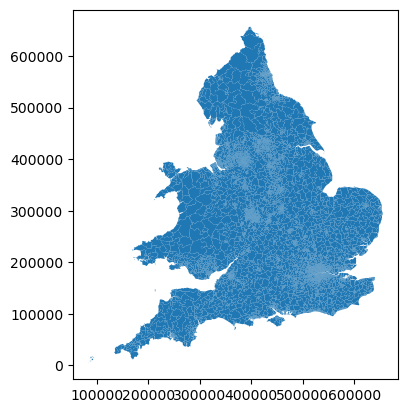

In [86]:
msoa_map = gpd.read_file('data/msoa_2021/MSOA_2021_EW_BGC_V3.shp')
msoa_map.plot()

In [87]:
msoa_all = pd.read_csv("data/msoa_OD_allactivity.csv.gz", compression="gzip")

In [92]:
# To select rows where o_msoa is equal to d_msoa, you can use a boolean condition.
intra_msoa_trips = msoa_all[msoa_all['o_msoa'] == msoa_all['d_msoa']]
intra_msoa_trips

o_msoa     d_msoa  num_trips
0       E02007005  E02007005      28854
1       E02000524  E02000524      27280
2       E02000001  E02000001      22293
3       E02000977  E02000977      21419
4       E02007099  E02007099      21154
...           ...        ...        ...
94596   E02000347  E02000347         95
107143  E02000729  E02000729         80
108362  E02002282  E02002282         79
113722  E02000414  E02000414         74
119574  E02000432  E02000432         69

[7264 rows x 3 columns]

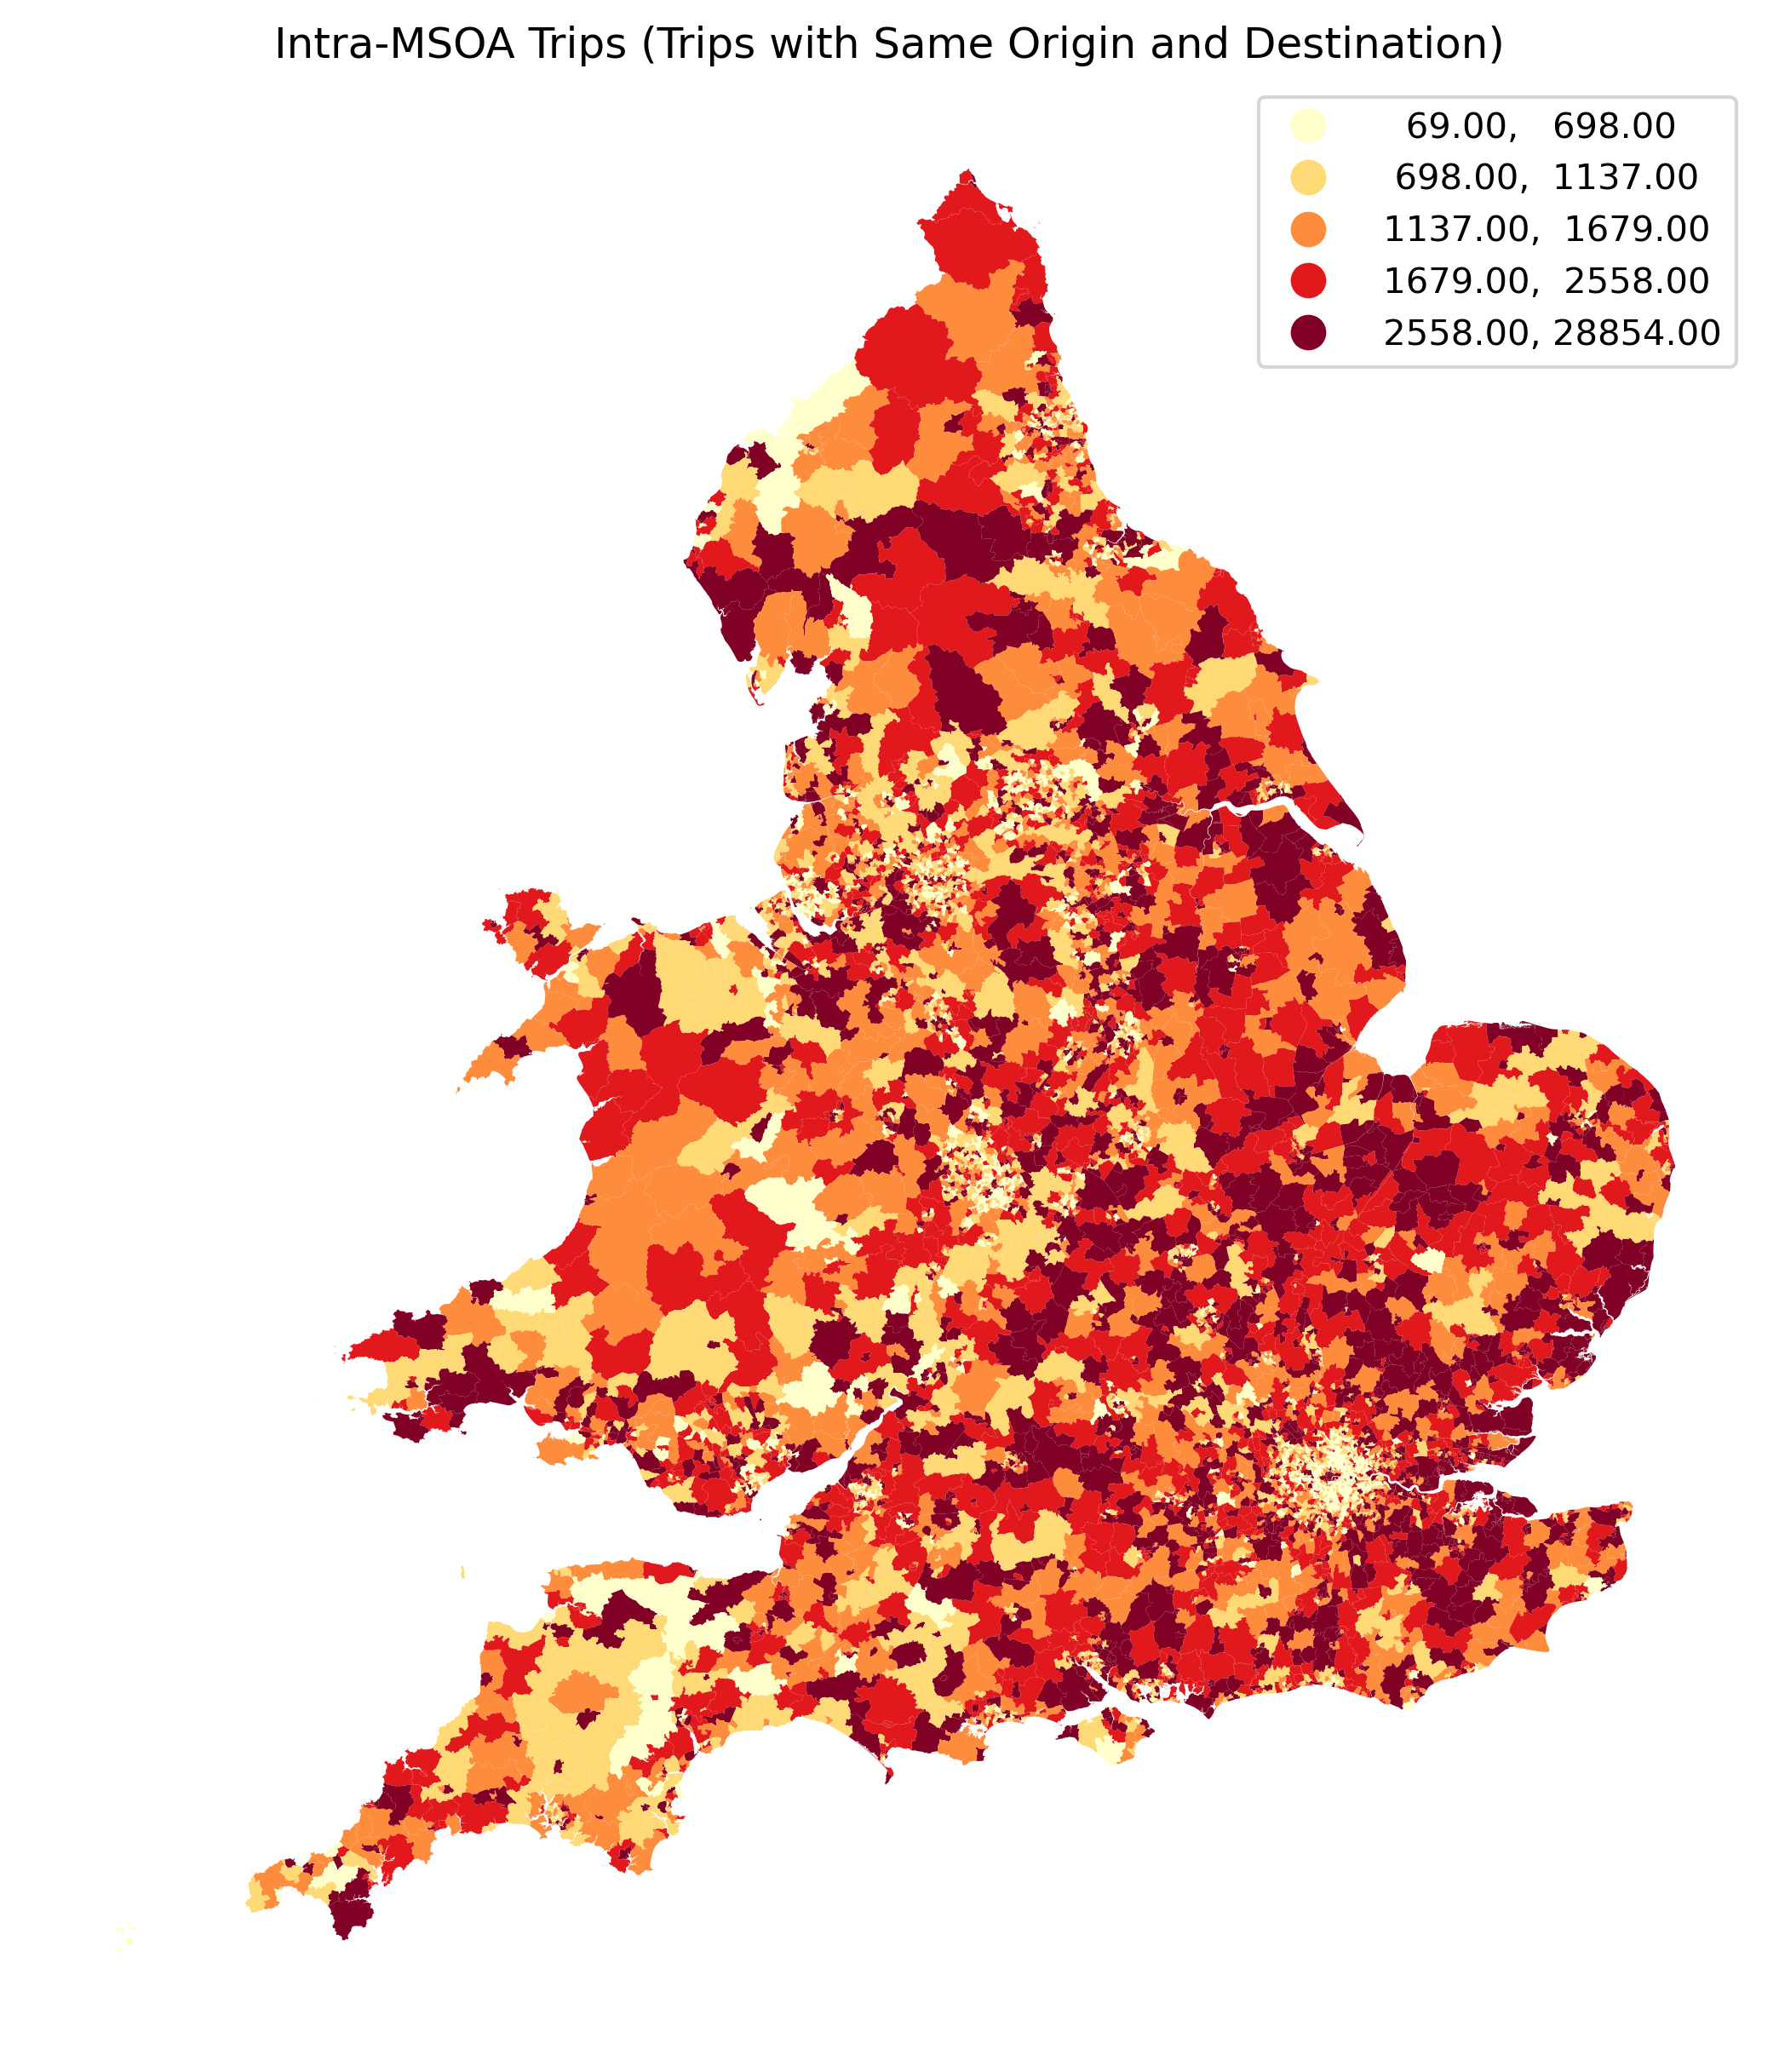

In [104]:
merged_gdf = msoa_map.merge(
    intra_msoa_trips,
    left_on='MSOA21CD',
    right_on='o_msoa',
    how='left'
)

# Fill any NaN values in `num_trips` with 0 after the merge.
merged_gdf['num_trips'] = merged_gdf['num_trips'].fillna(0)

# Create the map colored by num_trips.
fig, ax = plt.subplots(1, 1, figsize=(10, 10), dpi=300)
merged_gdf.plot(
    column='num_trips',
    ax=ax,
    legend=True,
    cmap='YlOrRd',
    edgecolor='None',
    linewidth=0.5,
    scheme='Quantiles'
)

ax.set_title('Intra-MSOA Trips (Trips with Same Origin and Destination)')
ax.set_axis_off()  # Turn off the axes for a cleaner map plot

# Display the map
plt.show()

In [ ]:
merged_gdf.explore(color="Red",tiles='cartodbpositron', tooltip=['id','label','latitude','longitude'], 
                    width=750, height=500)
merged_gdf.explore(
    column='num_trips',
    tiles='cartodbpositron',
    cmap='YlOrRd',
    scheme='Quantiles',
    tooltip=['MSOA21CD', 'num_trips'],
    legend_kwds={'caption': 'Number of Trips'}
)

In [91]:
msoa_all.iloc[0]

o_msoa       E02007005
d_msoa       E02007005
num_trips        28854
Name: 0, dtype: object

In [224]:
msoa_travel2work = pd.read_csv("data/msoa_OD_travel2work.csv.gz", compression="gzip")

In [225]:
intra_msoa_travel2work = msoa_travel2work[msoa_travel2work['MSOA21CD_home'] == msoa_travel2work['MSOA21CD_work']]
intra_msoa_travel2work

MSOA21CD_home               county_home MSOA21CD_work  \
0          E02000001  GREATER_LONDON_AUTHORITY     E02000001   
105        E02000002  GREATER_LONDON_AUTHORITY     E02000002   
175        E02000003  GREATER_LONDON_AUTHORITY     E02000003   
256        E02000004  GREATER_LONDON_AUTHORITY     E02000004   
329        E02000005  GREATER_LONDON_AUTHORITY     E02000005   
...              ...                       ...           ...   
323447     W02000423                  Caerdydd     W02000423   
323479     W02000424                   Wrecsam     W02000424   
323519     W02000426                   Wrecsam     W02000426   
323561     W02000427  Castell-nedd Port Talbot     W02000427   
323613     W02000428                  Abertawe     W02000428   

                     county_work  count  
0       GREATER_LONDON_AUTHORITY     23  
105     GREATER_LONDON_AUTHORITY      4  
175     GREATER_LONDON_AUTHORITY     10  
256     GREATER_LONDON_AUTHORITY      3  
329     GREATER_LONDON_AUTHORITY     13  
...                          ...    ...  
323447                  Caerdydd      5  
323479                   Wrecsam     10  
323519                   Wrecsam     60  
323561  Castell-nedd Port Talbot    100  
323613                  Abertawe     56  

[6831 rows x 5 columns]

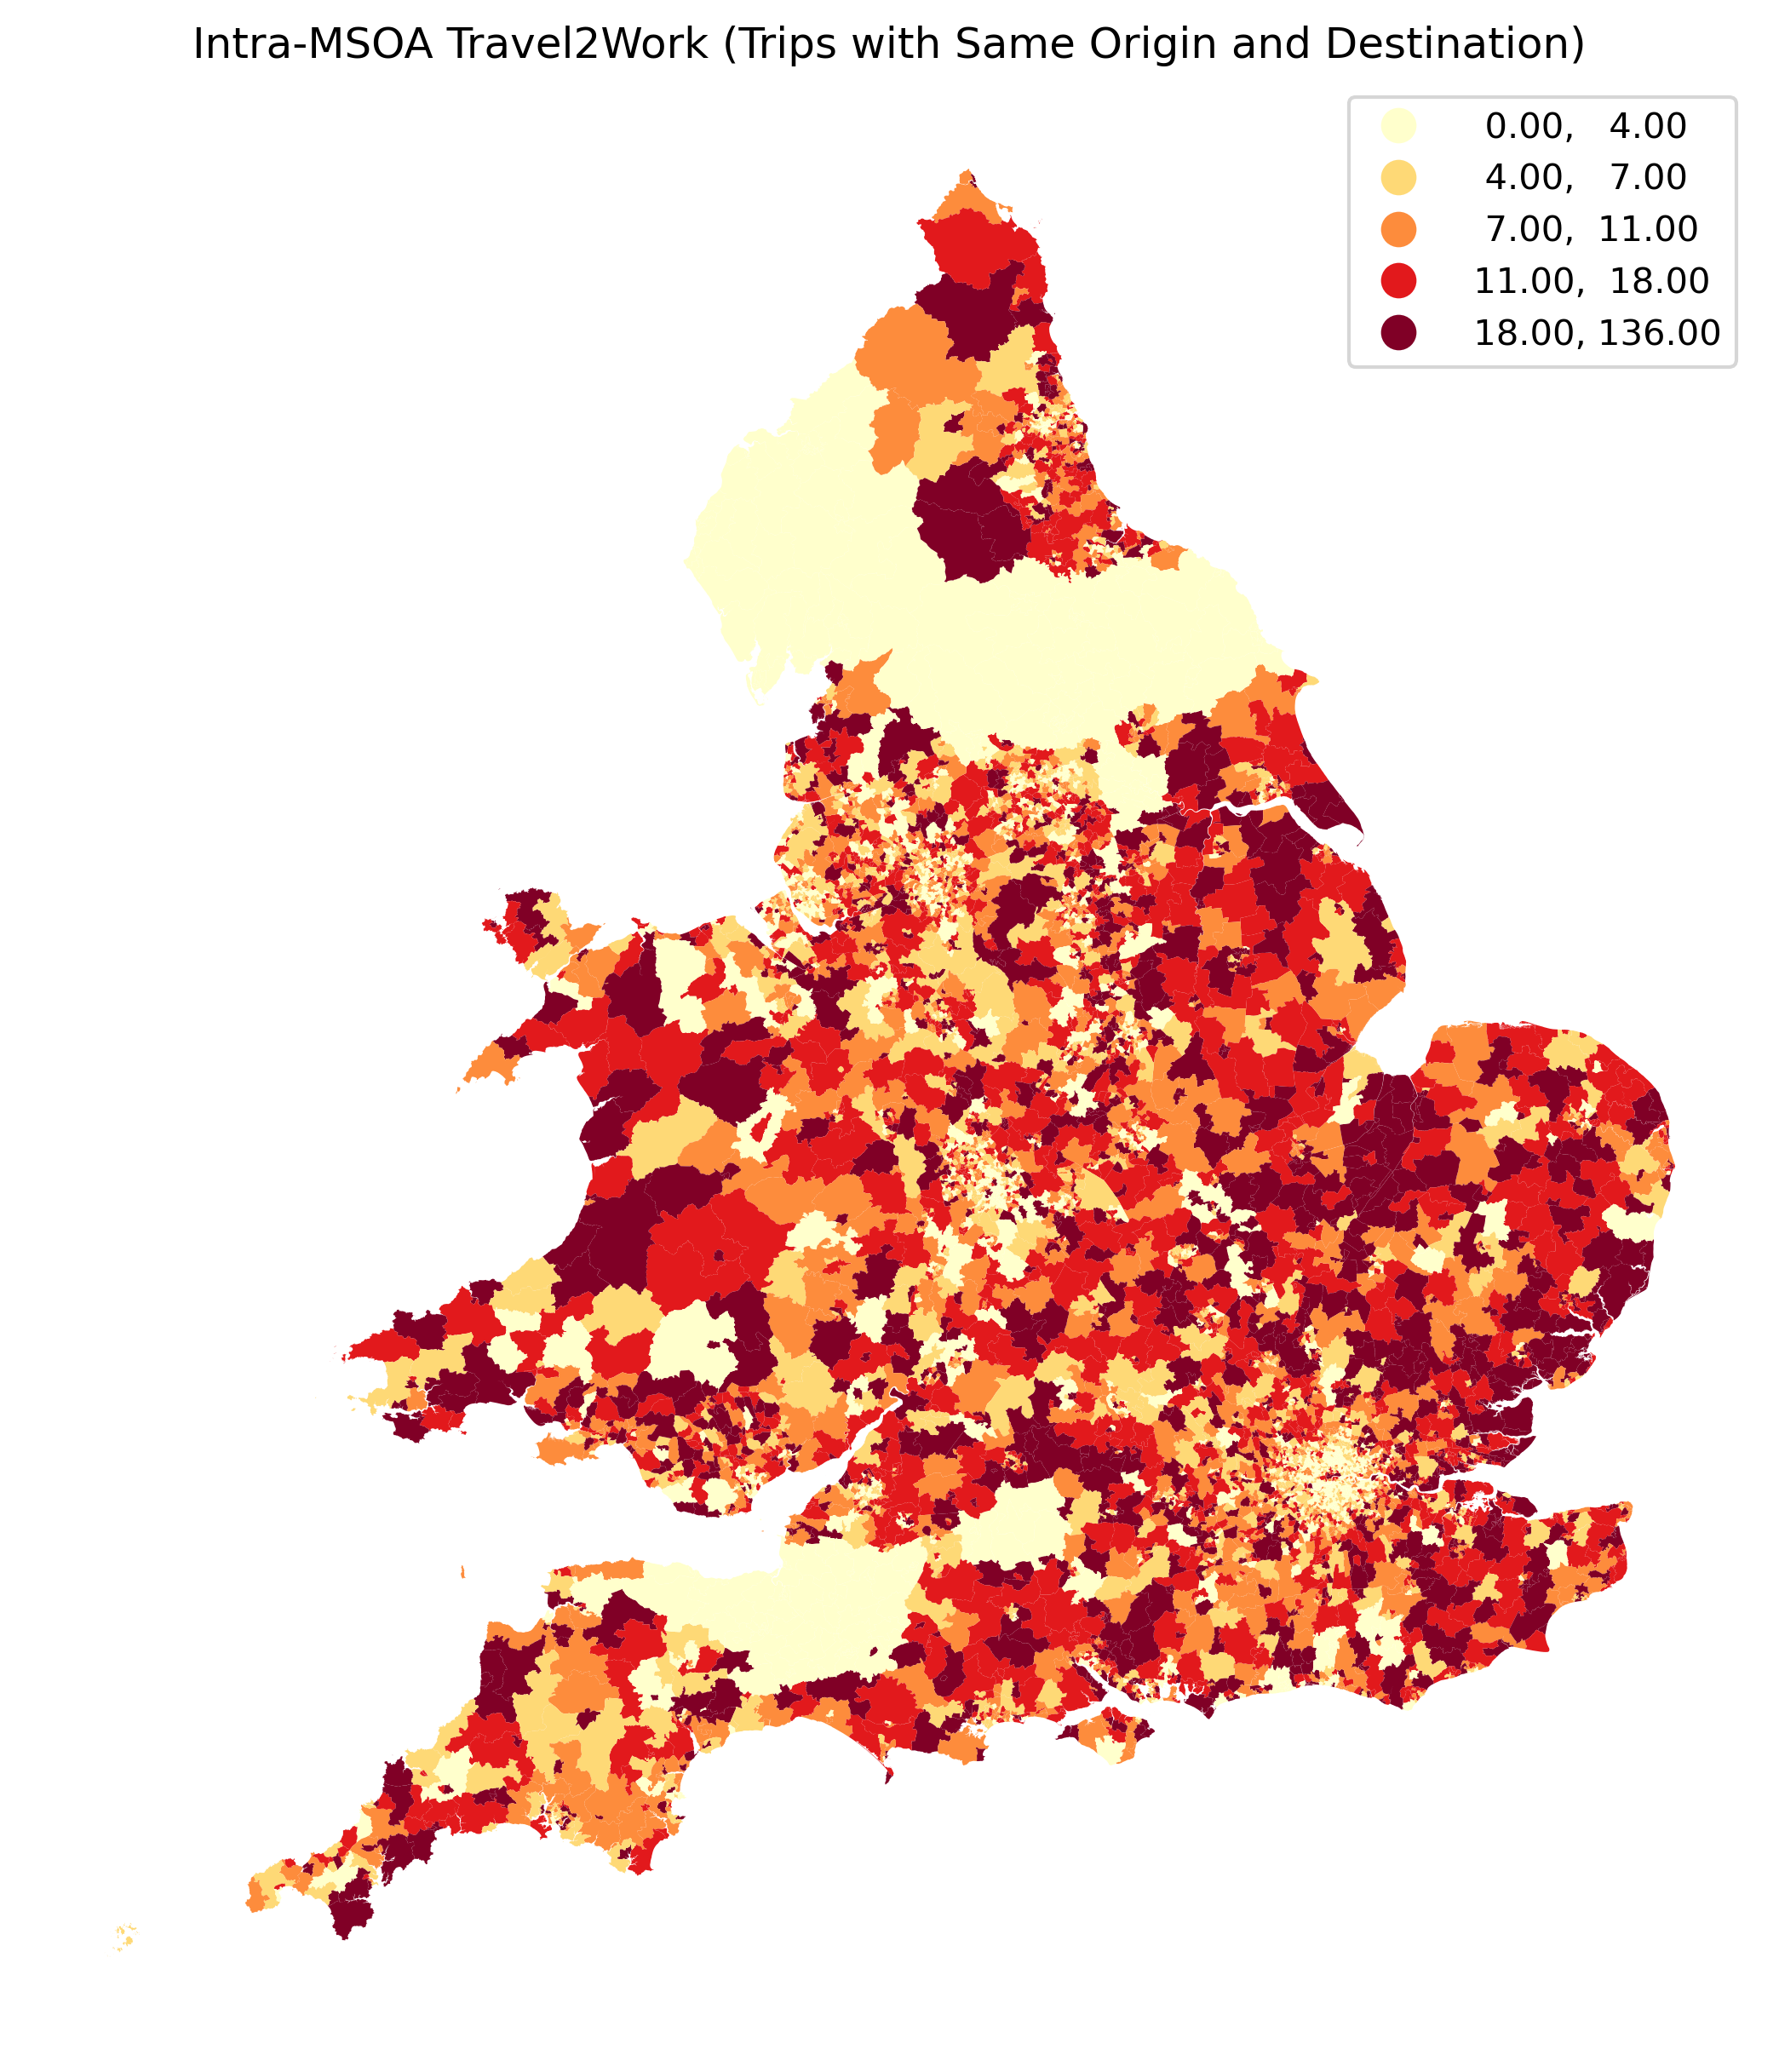

In [228]:
merged_gdf_travel2work = msoa_map.merge(
    intra_msoa_travel2work,
    left_on='MSOA21CD',
    right_on='MSOA21CD_home',
    how='left'
)

# Fill any NaN values in `num_trips` with 0 after the merge.
merged_gdf_travel2work['count'] = merged_gdf_travel2work['count'].fillna(0)

# Create the map colored by num_trips.
fig, ax = plt.subplots(1, 1, figsize=(10, 10), dpi=300)
merged_gdf_travel2work.plot(
    column='count',
    ax=ax,
    legend=True,
    cmap='YlOrRd',
    edgecolor='None',
    linewidth=0.5,
    scheme='Quantiles'
)

ax.set_title('Intra-MSOA Travel2Work (Trips with Same Origin and Destination)')
ax.set_axis_off()  # Turn off the axes for a cleaner map plot

# Display the map
plt.show()

In [25]:
traject_sample = pd.read_csv("data/trajectory_GLA_sample5000.csv.gz", compression="gzip")
traject_sample

# 1.for each user, calculate the total duration of each activity type, and get the most common activity to least common activity,
#   can be separate by weekday/weekend
# 1.1 then maybe we can do cluster based on the total activit duration
# 2. make box plot of each activity type, with y-axis as duration. also can be separate by weekday/weekend.
# 3. we can aggregate activity by day, and get the count of each activity.

userid           start_time  \
0       6B46AF01384055689E5FF203A19FFDFF  2021-11-01 10:30:00   
1       6B46AF01384055689E5FF203A19FFDFF  2021-11-02 21:30:00   
2       6B46AF01384055689E5FF203A19FFDFF  2021-11-05 10:15:00   
3       6B46AF01384055689E5FF203A19FFDFF  2021-11-05 12:45:00   
4       6B46AF01384055689E5FF203A19FFDFF  2021-11-05 16:30:00   
...                                  ...                  ...   
575105  6B2102F15AEAC07546E3E9488423AB2C  2021-11-27 14:30:00   
575106  6B2102F15AEAC07546E3E9488423AB2C  2021-11-27 15:45:00   
575107  6B2102F15AEAC07546E3E9488423AB2C  2021-11-28 12:30:00   
575108  6B2102F15AEAC07546E3E9488423AB2C  2021-11-28 14:15:00   
575109  6B2102F15AEAC07546E3E9488423AB2C  2021-11-28 14:30:00   

                   end_time     duration   loc_msoa    activity  
0       2021-11-02 19:15:00  1963.766667  E02000275        Work  
1       2021-11-03 23:30:00  1567.716667  E02000770        Home  
2       2021-11-05 11:00:00    30.266667  E02007019  Shopping_2  
3       2021-11-05 15:15:00   140.216667  E02000770        Home  
4       2021-11-05 17:15:00    40.033333  E02000772  Shopping_2  
...                     ...          ...        ...         ...  
575105  2021-11-27 14:45:00     2.083333  E02004979      Others  
575106  2021-11-27 16:00:00    10.066667  E02000436      Others  
575107  2021-11-28 12:30:00     3.100000  E02000454      Others  
575108  2021-11-28 14:30:00     9.933333  E02000436      Others  
575109  2021-11-28 14:45:00     6.900000  E02000438  Shopping_2  

[575110 rows x 6 columns]

## Add weekday information

In [32]:
traject_sample['start_time'] = pd.to_datetime(traject_sample['start_time'])
# Extract the full name of the day of the week.
traject_sample['day_of_week'] = traject_sample['start_time'].dt.day_name()
# Create a boolean column to identify weekends.
traject_sample['is_weekend'] = np.where(traject_sample['day_of_week'].isin(['Saturday', 'Sunday']), 'weekend', 'weekday')

In [76]:
traject_sample

userid          start_time  \
0       6B46AF01384055689E5FF203A19FFDFF 2021-11-01 10:30:00   
1       6B46AF01384055689E5FF203A19FFDFF 2021-11-02 21:30:00   
2       6B46AF01384055689E5FF203A19FFDFF 2021-11-05 10:15:00   
3       6B46AF01384055689E5FF203A19FFDFF 2021-11-05 12:45:00   
4       6B46AF01384055689E5FF203A19FFDFF 2021-11-05 16:30:00   
...                                  ...                 ...   
575105  6B2102F15AEAC07546E3E9488423AB2C 2021-11-27 14:30:00   
575106  6B2102F15AEAC07546E3E9488423AB2C 2021-11-27 15:45:00   
575107  6B2102F15AEAC07546E3E9488423AB2C 2021-11-28 12:30:00   
575108  6B2102F15AEAC07546E3E9488423AB2C 2021-11-28 14:15:00   
575109  6B2102F15AEAC07546E3E9488423AB2C 2021-11-28 14:30:00   

                   end_time     duration   loc_msoa    activity day_of_week  \
0       2021-11-02 19:15:00  1963.766667  E02000275        Work      Monday   
1       2021-11-03 23:30:00  1567.716667  E02000770        Home     Tuesday   
2       2021-11-05 11:00:00    30.266667  E02007019  Shopping_2      Friday   
3       2021-11-05 15:15:00   140.216667  E02000770        Home      Friday   
4       2021-11-05 17:15:00    40.033333  E02000772  Shopping_2      Friday   
...                     ...          ...        ...         ...         ...   
575105  2021-11-27 14:45:00     2.083333  E02004979      Others    Saturday   
575106  2021-11-27 16:00:00    10.066667  E02000436      Others    Saturday   
575107  2021-11-28 12:30:00     3.100000  E02000454      Others      Sunday   
575108  2021-11-28 14:30:00     9.933333  E02000436      Others      Sunday   
575109  2021-11-28 14:45:00     6.900000  E02000438  Shopping_2      Sunday   

       is_weekend  
0         weekday  
1         weekday  
2         weekday  
3         weekday  
4         weekday  
...           ...  
575105    weekend  
575106    weekend  
575107    weekend  
575108    weekend  
575109    weekend  

[575110 rows x 8 columns]

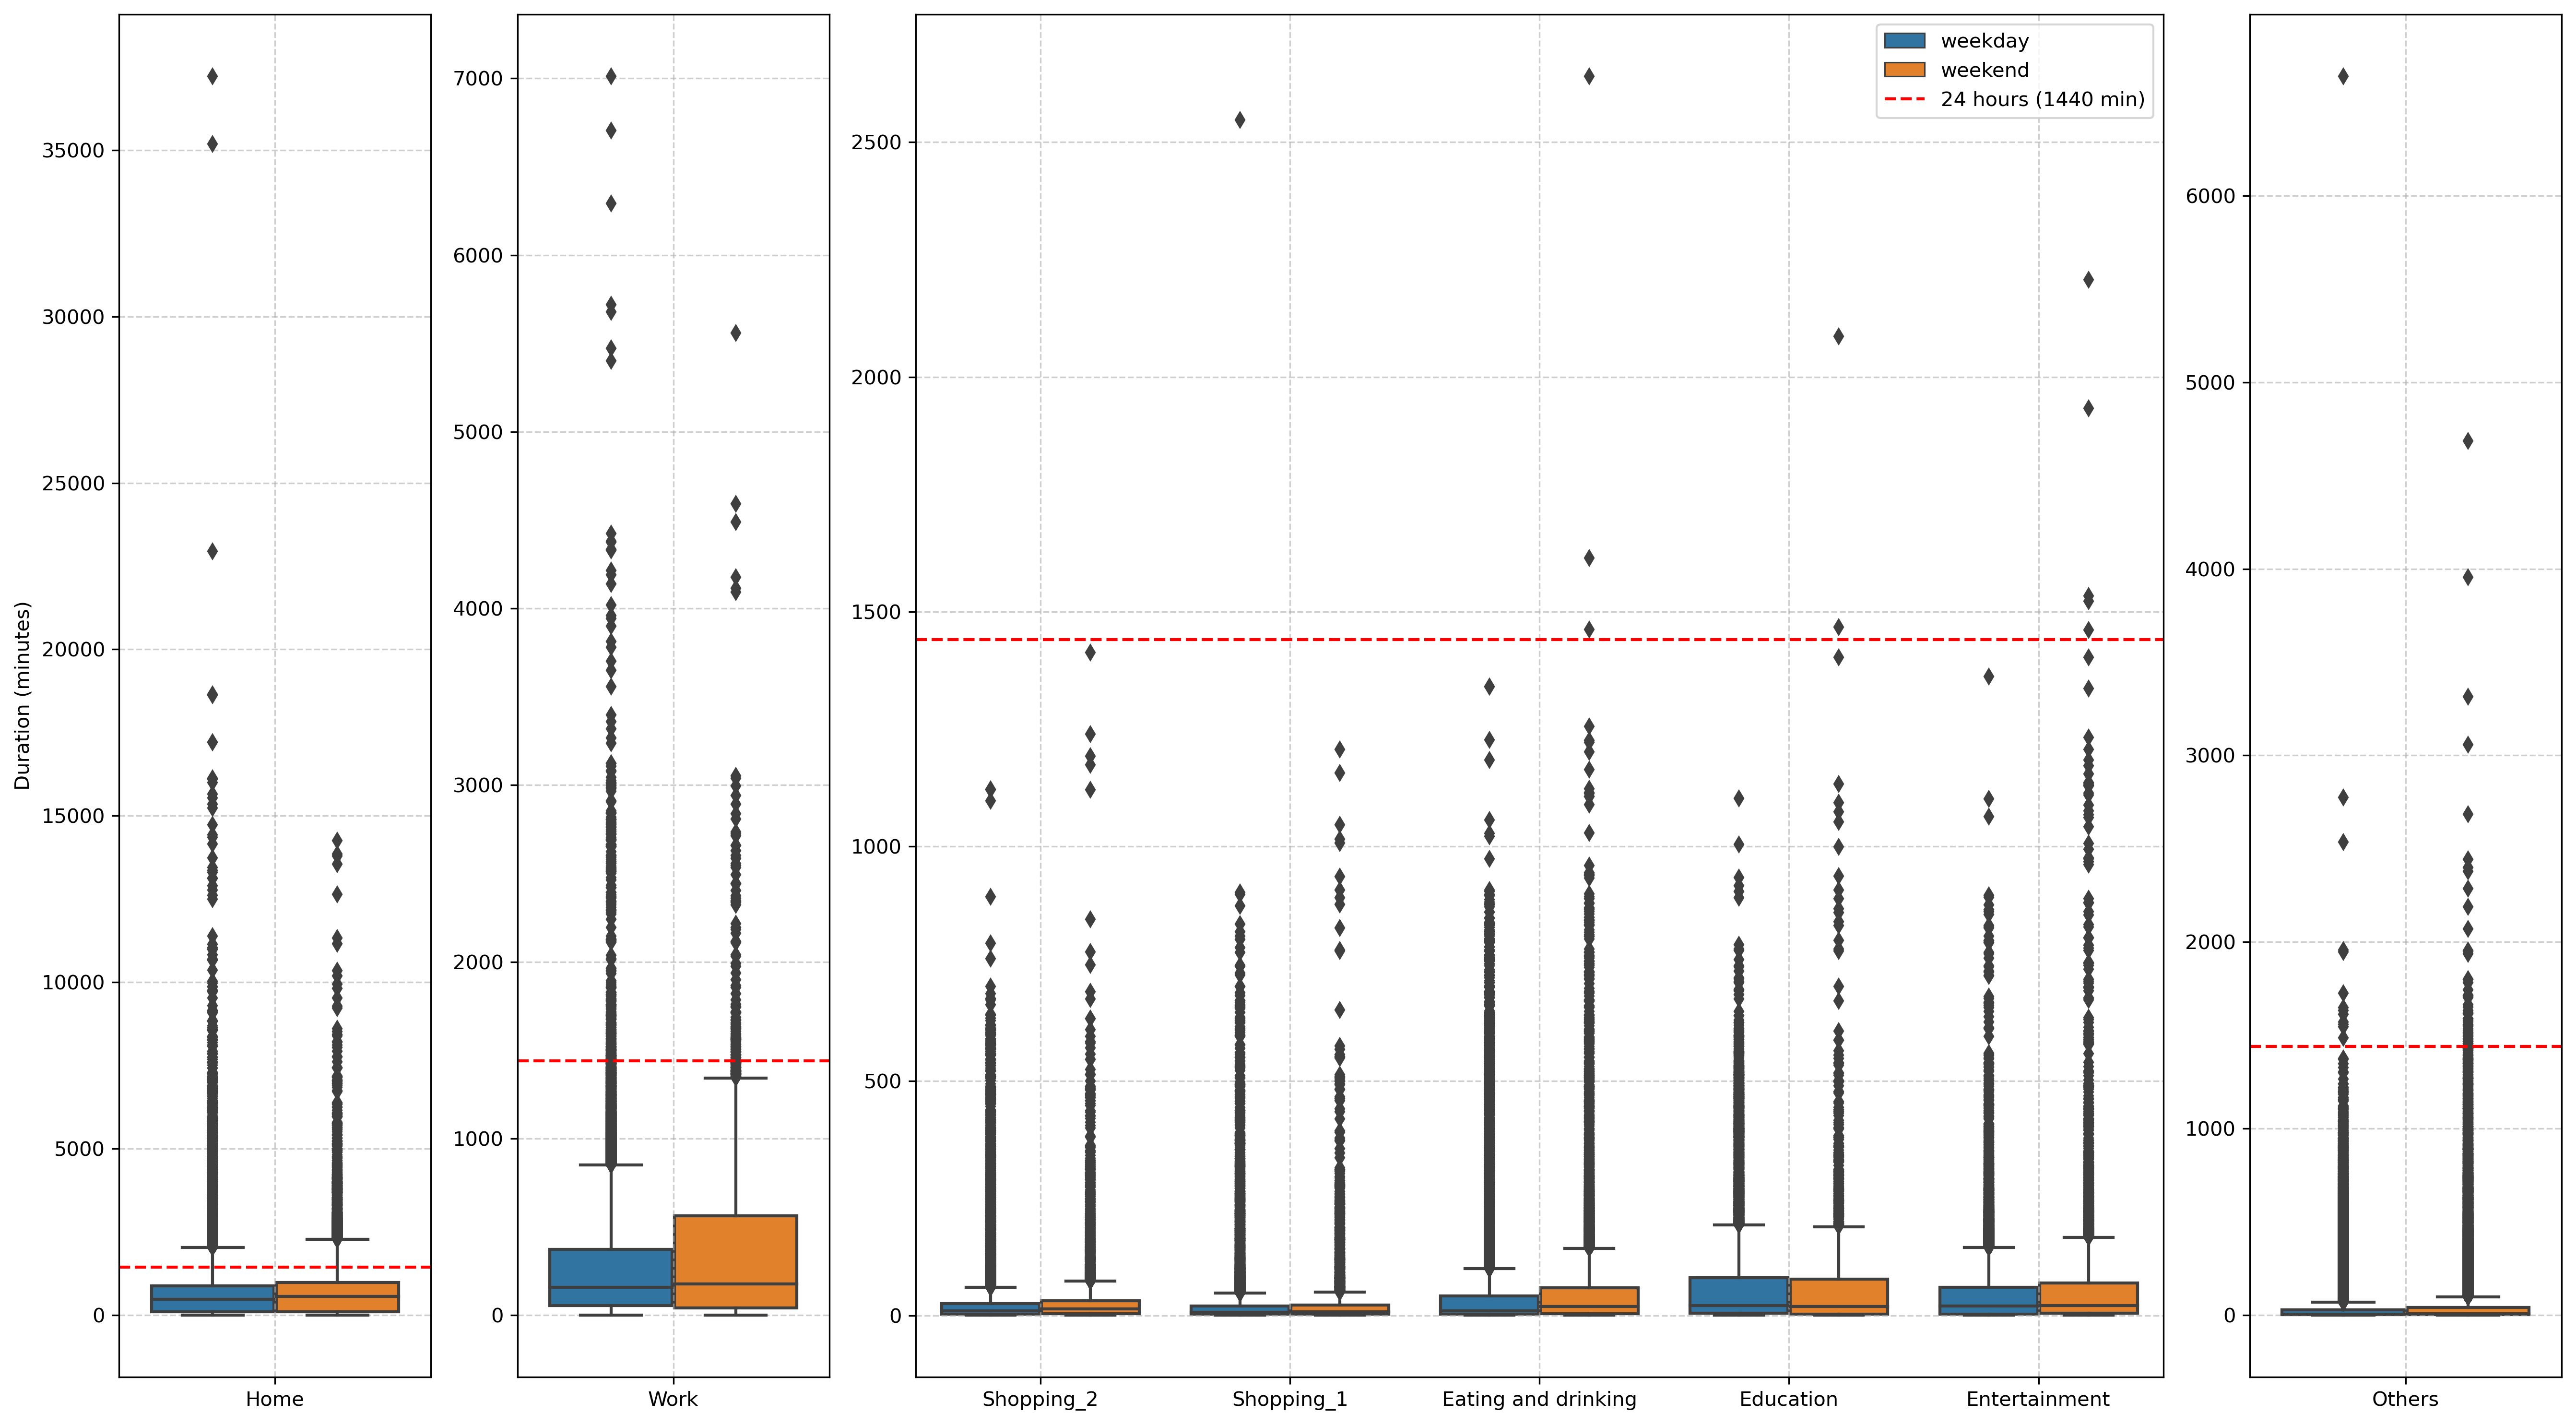

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

home_df = traject_sample[traject_sample['activity'] == 'Home']
work_df = traject_sample[traject_sample['activity'] == 'Work']
other_df = traject_sample[traject_sample['activity'] == 'Others']
other_activities_df = traject_sample[(traject_sample['activity'] != 'Home') & (traject_sample['activity'] != 'Work') & (traject_sample['activity'] != 'Others')] 

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(18, 10), gridspec_kw={'width_ratios': [1, 1, 4, 1]}, dpi=300)

# Create box plot
sns.boxplot(x='activity', y='duration', hue='is_weekend', data=home_df, ax=ax1)
ax1.set_ylabel('Duration (minutes)')
ax1.set_xlabel('')
ax1.legend().remove()
ax1.grid(True, linestyle='--', alpha=0.6)
ax1.axhline(y=1440, color='r', linestyle='--', label='24 hours (1440 min)')


sns.boxplot(x='activity', y='duration', hue='is_weekend', data=work_df, ax=ax2)
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.legend().remove()
ax2.grid(True, linestyle='--', alpha=0.6)
ax2.axhline(y=1440, color='r', linestyle='--', label='24 hours (1440 min)')

sns.boxplot(x='activity', y='duration', hue='is_weekend', data=other_activities_df, ax=ax3)
ax3.set_xlabel('')
ax3.set_ylabel('')
ax3.grid(True, linestyle='--', alpha=0.6)
ax3.axhline(y=1440, color='r', linestyle='--', label='24 hours (1440 min)')
ax3.legend()

sns.boxplot(x='activity', y='duration', hue='is_weekend', data=other_df, ax=ax4)
ax4.set_xlabel('')
ax4.set_ylabel('')
ax4.legend().remove()
ax4.grid(True, linestyle='--', alpha=0.6)
ax4.axhline(y=1440, color='r', linestyle='--', label='24 hours (1440 min)')

plt.tight_layout()
plt.show()


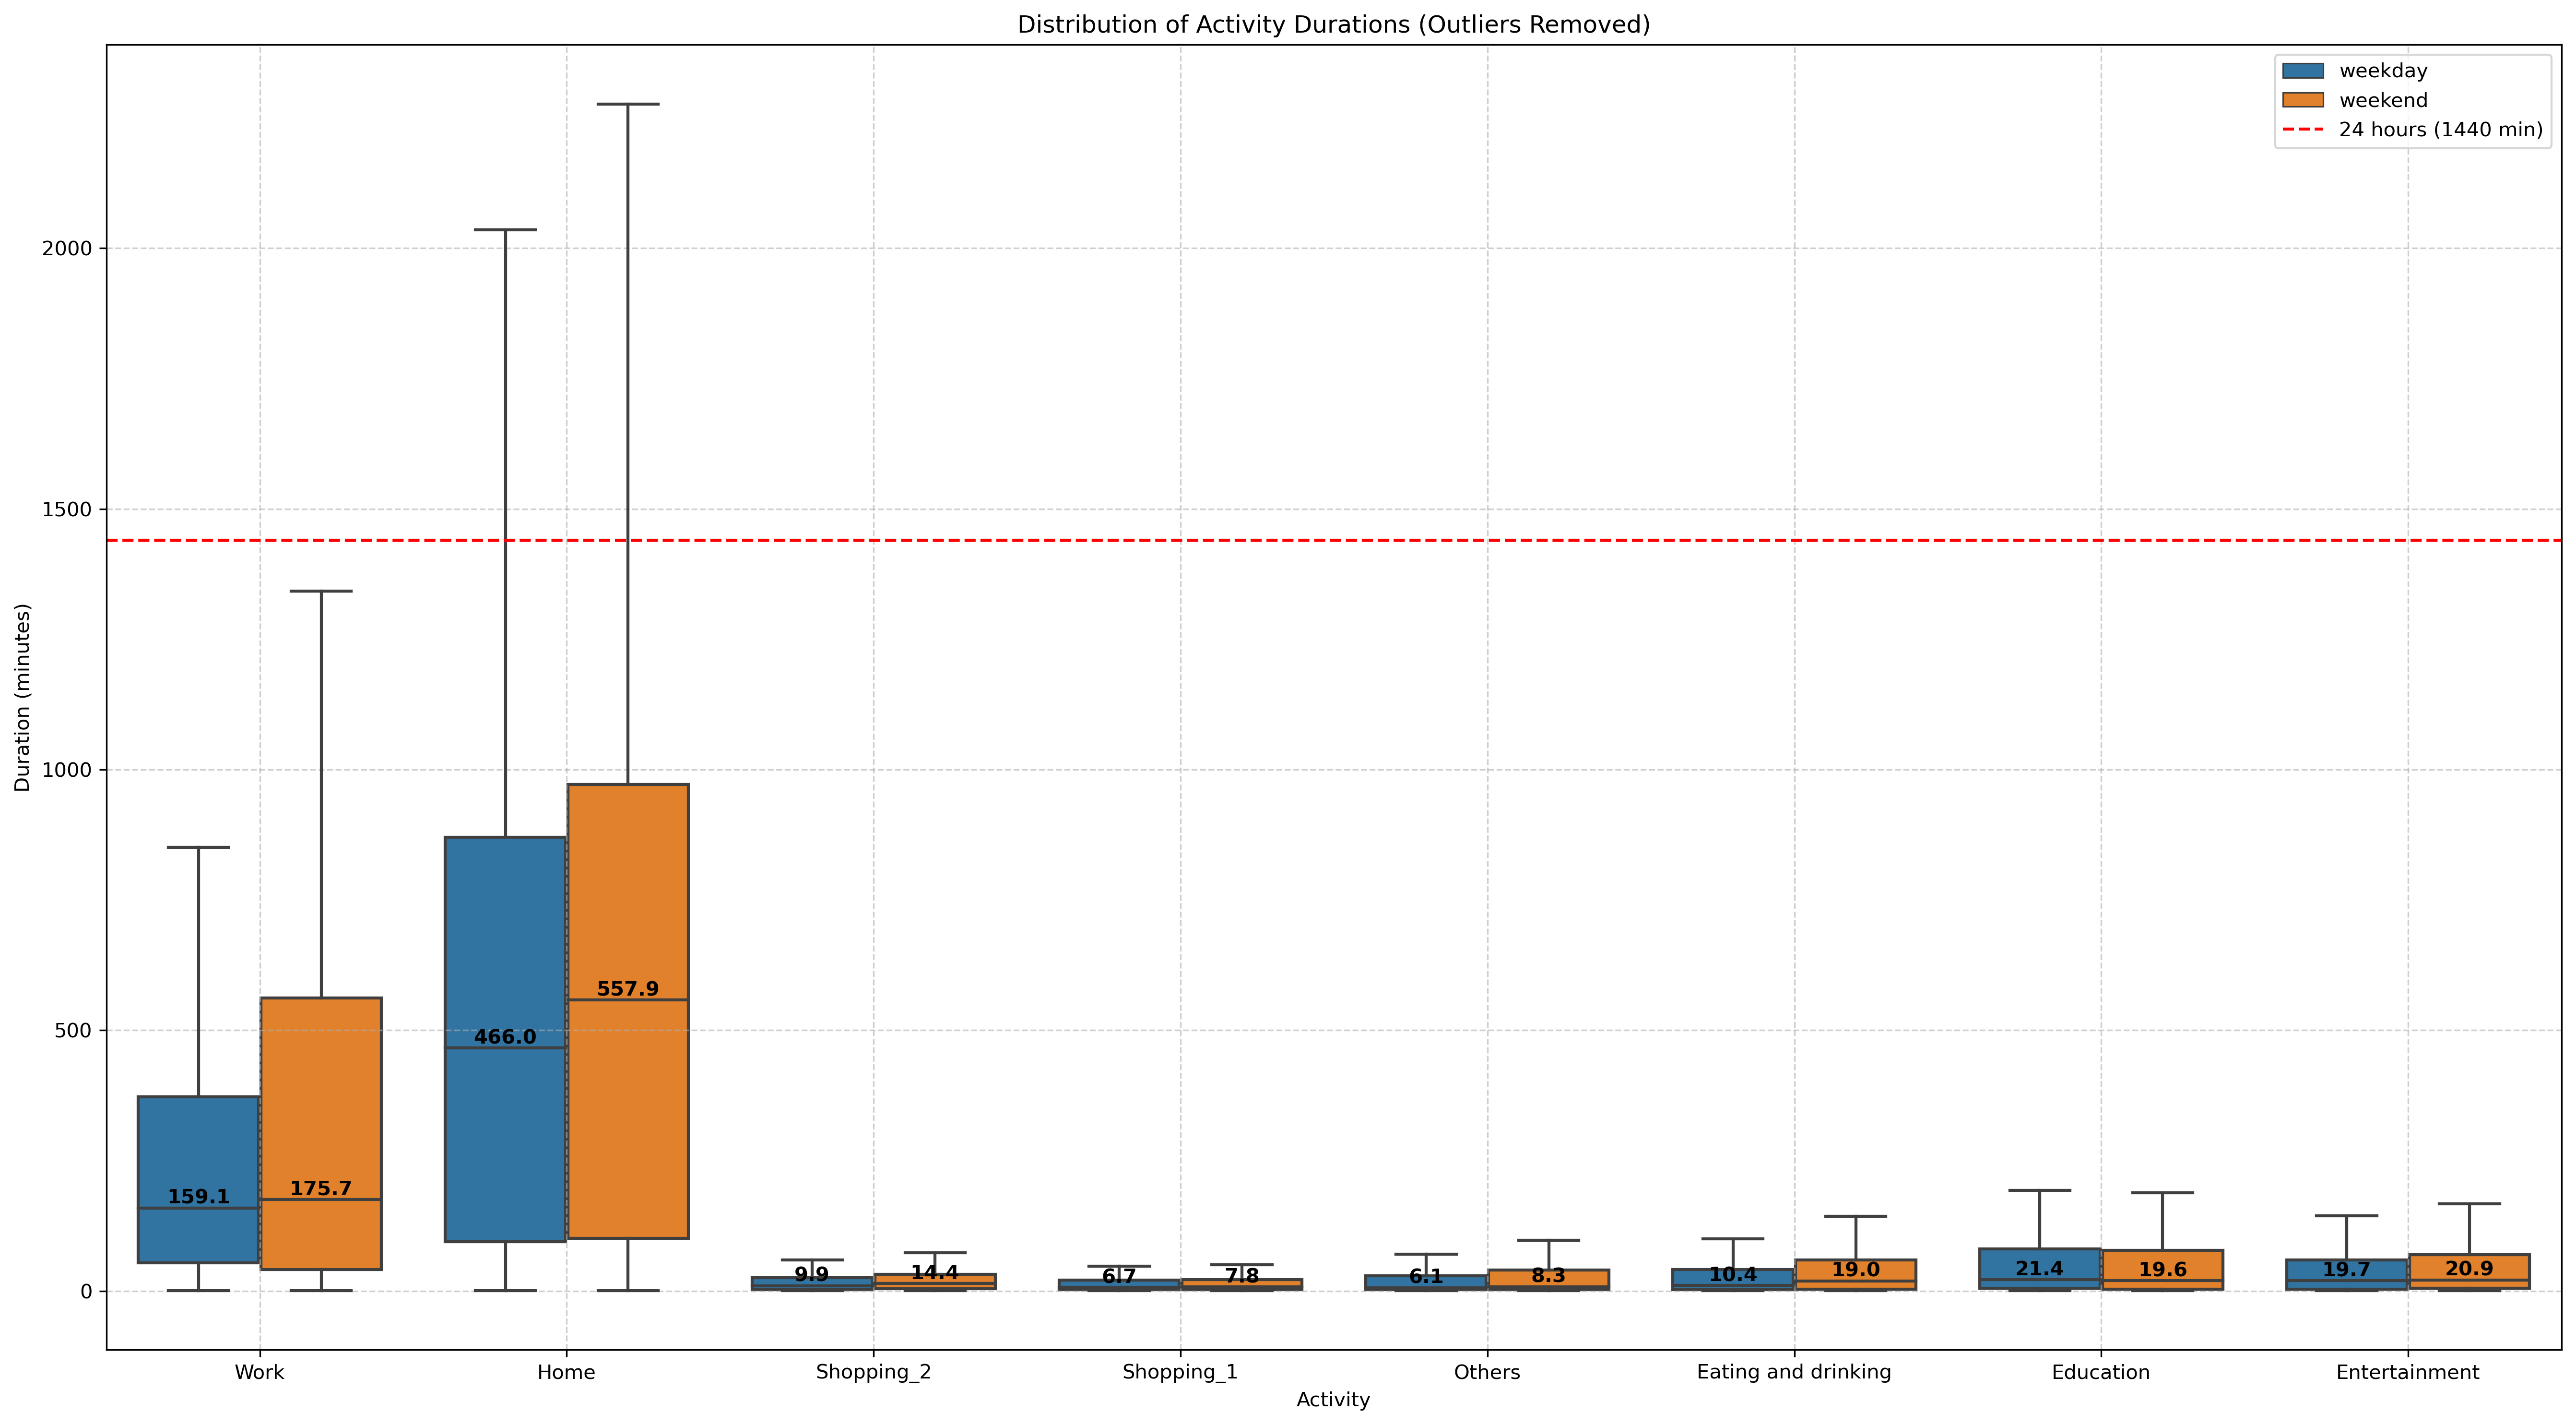

In [75]:
plt.figure(figsize=(18, 10), dpi=300)
sns.boxplot(x='activity', y='duration', hue='is_weekend', data=traject_sample, showfliers=False)

# Add the 24-hour line for context.
plt.axhline(y=1440, color='r', linestyle='--', label='24 hours (1440 min)')

# Step 4: Add median values as text annotations.
# Iterate through each activity and day type to calculate the median and annotate.
for i, activity in enumerate(traject_sample['activity'].unique()):
    for j, day_type in enumerate(traject_sample['is_weekend'].unique()):
        # Filter the DataFrame for the current group
        group_data = traject_sample[(traject_sample['activity'] == activity) & (traject_sample['is_weekend'] == day_type)]
        
        # Check if the group has data before calculating quantiles
        if not group_data.empty:
            median = group_data['duration'].median()

            # Determine the x-position for the annotation.
            # The x-position of the box depends on its order in the plot.
            box_pos = i - 0.2 if day_type == 'weekday' else i + 0.2
            
            # Annotate the plot with the values
            plt.text(box_pos, median, f'{median:.1f}', ha='center', va='bottom', fontsize=10, color='black',weight='bold')

plt.title('Distribution of Activity Durations (Outliers Removed)')
plt.xlabel('Activity')
plt.ylabel('Duration (minutes)')
plt.grid(True, linestyle='--', alpha=0.6)

# Create a single legend for the entire figure.
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels)

plt.tight_layout()
plt.show()

In [37]:
traject_sample.iloc[0]

userid         6B46AF01384055689E5FF203A19FFDFF
start_time                  2021-11-01 10:30:00
end_time                    2021-11-02 19:15:00
duration                            1963.766667
loc_msoa                              E02000275
activity                                   Work
day_of_week                              Monday
is_weekend                              weekday
Name: 0, dtype: object

In [24]:
print(len(set(traject_sample.userid)))
print(traject_sample.activity.unique())

5000
['Work' 'Home' 'Shopping_2' 'Shopping_1' 'Others' 'Eating and drinking'
 'Education' 'Entertainment']
